# **BT thực hành 3.2: PCA - Giảm chiều với dữ liệu IRIS**
- Áp dụng PCA và biểu diễn trực quan dữ liệu trong tập tin **Iris.xls**


> Cập nhật: **07/2023**



In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Edu/Chia se hoc lieu/LDS3/Bai tap HV/Ch3_PCA'

Mounted at /content/gdrive


In [ ]:
## Thư viện
import matplotlib.pyplot   as plt
import numpy               as np
import pandas              as pd
import seaborn             as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA

In [ ]:
## Đọc tập tin vào dataframe
df     = pd.read_excel(folder + '/Data/Iris.xlsx')
target = 'iris'
print('* Biến phân lớp:', target)

## Danh sách các features
nb_features = df.shape[1] - 1
features    = df.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features), '\n')

print(df.head())

* Biến phân lớp: iris
* Số lượng features =  4
  Các features: sepallength, sepalwidth, petallength, petalwidth 

   sepallength  sepalwidth  petallength  petalwidth         iris
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [ ]:
## Áp dụng PCA với k = 2
A = df[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']].values

pca = PCA(n_components = 2)
pca.fit(A)

PCA(n_components=2)

In [ ]:
## Hiển thị kết quả tóm tắt
#  components_: array, shape (n_components, n_features)
#               Các thành phần chính trong không gian features,
#               biểu thị các hướng của phương sai tối đa trong dữ liệu
#  explained_variance_ : array, shape (n_components,)
#               Lượng phương sai được giải thích bởi từng thành phần được chọn.
print('PCA.components:\n', pca.components_)
print('PCA.shape:', pca.components_.shape)
print('PCA.explained variance:', pca.explained_variance_)
print('PCA.explained variance shape:', pca.explained_variance_.shape)

PCA.components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
PCA.shape: (2, 4)
PCA.explained variance: [4.22484077 0.24224357]
PCA.explained variance shape: (2,)


In [ ]:
## Phép chiếu dữ liệu vào không gian MỚI (tọa độ mới)
P = pca.transform(A)
P[0:5]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456]])

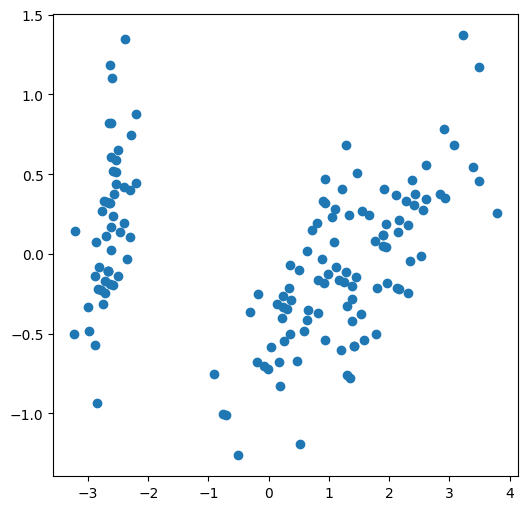

In [ ]:
## Biểu diễn trực quan dữ liệu
plt.figure(figsize = (6, 6))
plt.scatter(P[:, 0], P[:, 1])
plt.show()

In [ ]:
## Gán column names cho các cột
df_pca = pd.DataFrame(P, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [ ]:
## Ghép nối thêm cột phân lớp (target = 'iris'), đặt tên là cột 'type'
df_pca['type'] = df['iris']
df_pca.head()

,PC 1,PC 2,type
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


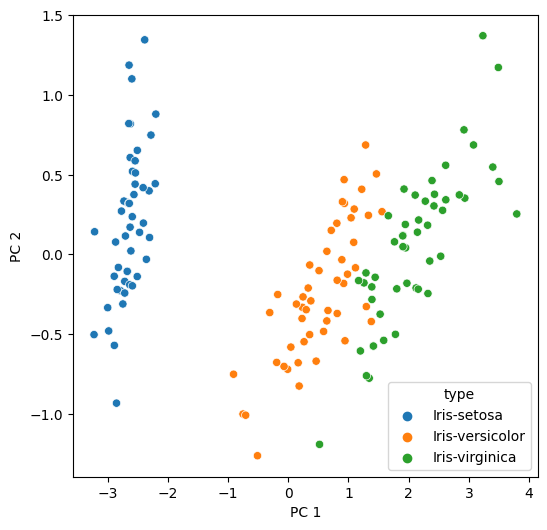

In [ ]:
## Biểu diễn trực quan dữ liệu sau khi áp dụng PCA
plt.figure(figsize = (6, 6))
sns.scatterplot(x = "PC 1", y = "PC 2", data = df_pca, hue = 'type')
plt.show()

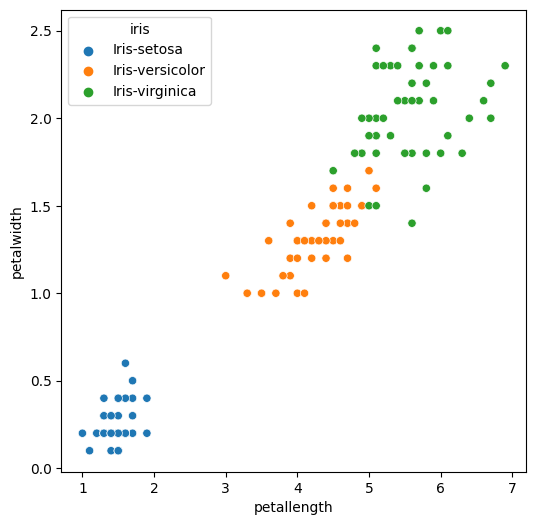

In [ ]:
## Biểu diễn trực quan dữ liệu BAN ĐẦU
plt.figure(figsize = (6, 6))
sns.scatterplot(x = "petallength", y = "petalwidth", data = df, hue = 'iris')
plt.show()